In [1]:
import math
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt

# Calculate distance between two cities based on their numbers
def distance(city_1, city_2):
    x_1 = x[city_1 - 1]
    x_2 = x[city_2 - 1]
    y_1 = y[city_1 - 1]
    y_2 = y[city_2 - 1]
    return math.sqrt(pow(x_1 - x_2, 2) + pow(y_1 - y_2, 2))
    

# Plot a line between two cities
def plot_line(city_1, city_2, line_color, pheromone):
    x_1 = x[city_1 - 1]
    x_2 = x[city_2 - 1]
    y_1 = y[city_1 - 1]
    y_2 = y[city_2 - 1]
    ax.plot([x_1, x_2], [y_1, y_2], color=line_color, linewidth=(20*pheromone**2+0.1))

# Number of ants
m = 10

# Decision coefficients (pheromone, distance)
alpha = 1
beta = 5

# Evaporation coefficient (pheromone decay)
rho = 0.5

# Initial pheromone value
tau_0 = 0.1

# Number of iterations (whole tours)
total_tours = 50

# Import cities coordinates to x and y vectors
cities = open('AS_map_4.txt')
for line in cities:
    if (line[0] == 'x'):
        x = list(map(lambda s: float(s), line[5:-3].split()))
    if (line[0] == 'y'):
        y = list(map(lambda s: float(s), line[5:-3].split()))

# Check validity of coordinates in the file
if (len(x) != len(y)):
    raise SystemExit("Cities coordinates invalid")
else:
    N = len(x)

# Euclidean distance between city i and j
d = pd.DataFrame(data = tau_0, index = range(1, N+1), columns = range(1, N+1))
for city in d:
    d[city] = [distance(city, city_2) for city_2 in d.index]

# Amount of pheromone between city i and j
tau = pd.DataFrame(data = tau_0, index = range(1, N+1), columns = range(1, N+1))
for i in tau.index:
    tau.loc[i, i] = 0

Best path in tour 1: 45.606365114955146  	(10.0%)
Best path in tour 2: 43.88617196435216  	(10.0%)
Best path in tour 3: 47.11060520764428  	(10.0%)
Best path in tour 4: 46.30920398298284  	(10.0%)
Best path in tour 5: 43.88617196435216  	(10.0%)
Best path in tour 6: 43.886171964352165  	(10.0%)
Best path in tour 7: 43.62947603368915  	(10.0%)
Best path in tour 8: 43.62947603368915  	(10.0%)
Best path in tour 9: 43.62947603368915  	(10.0%)
Best path in tour 10: 43.886171964352165  	(10.0%)
Best path in tour 11: 43.78409838392295  	(10.0%)
Best path in tour 12: 43.88617196435216  	(10.0%)
Best path in tour 13: 43.62947603368915  	(10.0%)
Best path in tour 14: 43.62947603368915  	(20.0%)
Best path in tour 15: 43.62947603368915  	(10.0%)
Best path in tour 16: 43.62947603368915  	(10.0%)
Best path in tour 17: 43.78409838392295  	(10.0%)
Best path in tour 18: 43.78409838392295  	(20.0%)
Best path in tour 19: 43.78409838392295  	(20.0%)
Best path in tour 20: 43.78409838392295  	(20.0%)
Best p

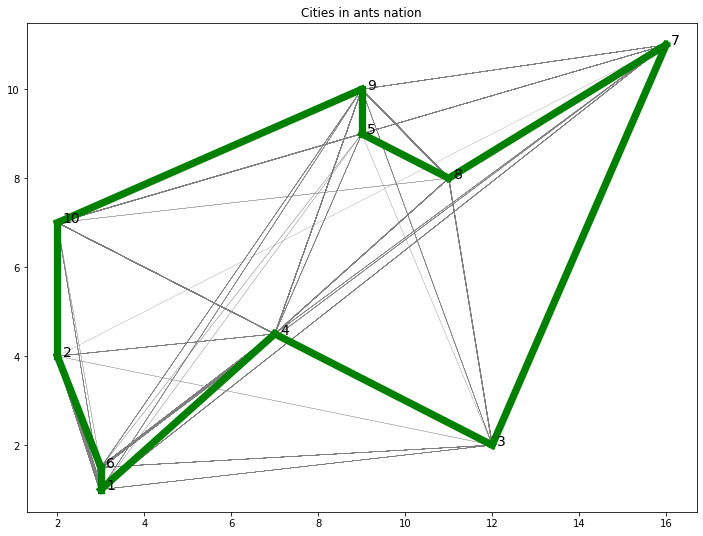

In [2]:
# Create a list of fixed starting points for each ant
hometowns = [rnd.randint(1, N) for i in range(0, m)]

# Draw a figure with the cities
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
ax.plot(x, y, 'bo', ms=4)
ax.set_title('Cities in ants nation')
for i in range(0, N):
    ax.annotate(i+1, (x[i]+0.12, y[i]), fontsize = 14)
    
# Set the shortest path length holder variable
shortestPathLength = sum(d.unstack())

# Embark on a tour quite a few times
for tour in range(0, total_tours):
    
    # Create a table of ants, columns named like cities for memory of visits
    ants = pd.DataFrame(data = False, index = range(0, m), columns=range(1, N+1))
    ants['Current'] = hometowns
    ants['TourLength'] = 0.0
    for ant in ants.index:
        ants.loc[ant, ants.loc[ant,'Current']] = True

    # Cities visited by each ant in order
    tours = {ant: [ants.loc[ant, 'Current']] for ant in ants.index}

    # While not all ants visited not all cities
    while (~(ants.xs(range(1, N+1), axis = 1).all()).all()):

        # Pheromone over distance, numerator of decision table
        a_num = (tau**alpha/d**beta).fillna(0)

        # Dividing numerators by the sum of eligible neighbours
        a = pd.DataFrame(index = ants.index, columns = a_num.columns)
        for ant in ants.index:
            current = ants.loc[ant, 'Current']
            neighbourhood = sum(~ants.loc[ant][0:N] * a_num[current])
            a.loc[ant] = (a_num[current] / neighbourhood) * ~ants.loc[ant][0:N]

        # Normalization (redundant)
        for ant in a.index:
            a.loc[ant] /= sum(a.loc[ant])

        # Selecting next city to travel to
        next_city = pd.Series(index = ants.index, data = 0)
        for ant in a.index:
            preffered = a.loc[ant]
            its_my_goddamn_choice = rnd.random()
            while(True):
                best_city = preffered[preffered == max(preffered)].index[0]
                if (its_my_goddamn_choice <= max(preffered)):
                    next_city.loc[ant] = best_city
                    break
                else:
                    its_my_goddamn_choice -= max(preffered)
                    preffered.drop(labels=best_city, inplace=True)

        # Travelling to the chosen city
        for ant in ants.index:
            current = ants.loc[ant, 'Current']
            
            # Calculate distanace, add to tour length
            ants.loc[ant, 'TourLength'] += distance(current, next_city[ant])

            # Plot the travel on a map
            plot_line(current, next_city[ant], 'grey', tau.at[current, next_city[ant]])

            # Set new city as the current city, add to tour
            ants.loc[ant, 'Current'] = next_city[ant]
            tours[ant].append(next_city[ant])

            # Update visited cities
            ants.loc[ant, ants.loc[ant,'Current']] = True
        
    # Calculate distanace to finally come back, add to tour length and plot it
    for ant in ants.index:
        ants.loc[ant, 'TourLength'] += distance(ants.loc[ant, 'Current'], hometowns[ant])
        plot_line(ants.loc[ant, 'Current'], hometowns[ant], 'grey', tau.at[ants.loc[ant, 'Current'], next_city[ant]])

    # Evaporate some and deposit new pheromones 
    tau *= (1 - rho)
    for ant in tours:
         for city in range(0, N-1):
            tau.at[tours[ant][city], tours[ant][city+1]] += 1/ants.loc[ant, 'TourLength']
            tau.at[tours[ant][city+1], tours[ant][city]] += 1/ants.loc[ant, 'TourLength']
            
    # Evaluate best travel distance
    for ant in tours:
        if (ants.loc[ant, 'TourLength'] <= shortestPathLength):
            shortestPathLength = ants.loc[ant, 'TourLength']
            shortestPath = tours[ant]

    # Print shortest distance in each tour
    bestHere = min(ants['TourLength'])
    percentage = 100*len(ants[ants['TourLength'] == bestHere])/m
    print(f'Best path in tour {tour+1}: {bestHere}  \t({percentage}%)')

# Draw the shortest path on the map
for city in range(0, N):
    plot_line(shortestPath[city], shortestPath[(city+1) % N], 'green', 0.6)

print(f'Optimal path: {shortestPath}\nLength: {shortestPathLength}\n')